In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Dataset

In [2]:
# import dataset from drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/project/data-science/hotel-bookings/hotel_bookings.csv' # your file path

df = pd.read_csv(path)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info() # dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Cleaning

## Check Duplicate Data

In [5]:
print(f'Total number of duplicate is {df.duplicated().sum()}')

Total number of duplicate is 31994


In [6]:
# drop duplicate values
df = df.drop_duplicates()

# check duplicate values once again
print(f'Total number of duplicated values right now is {df.duplicated().sum()}')

Total number of duplicated values right now is 0


## Check Missing Values

In [7]:
# check missing values for each column

df.isnull().sum().rename('Total Missing Values').sort_values(ascending=False)

,Total Missing Values
company,82137
agent,12193
country,452
children,4
arrival_date_month,0
arrival_date_week_number,0
hotel,0
is_canceled,0
stays_in_weekend_nights,0
arrival_date_day_of_month,0


1. Remove rows where the country column is null, since they account for only 0.4% of the data and are unlikely to affect overall analysis.

2. Drop the company column because over 90% of its values are missing, making it unsuitable for modeling or analysis.

3. Fill missing values in the agent column with the category 'Unknown', as this feature holds important information that could contribute significantly to machine learning model performance.

In [8]:
df = df.drop(["company"], axis=1)

In [9]:
# we fill the 'agent' missing values with the average of 'agent' per 'is_canceled'

df['agent'] = df['agent'].fillna(
    df.groupby('is_canceled')['agent'].transform('mean')
)

In [10]:
# remove the rest row that have missing values

df = df.dropna()

# Feature Engineering

In [12]:
df['room_change'] = (df['assigned_room_type'] != df['reserved_room_type']).astype(int) # if there is a room exhange
df['total_people'] = df['adults'] + df['children'] + df['babies'] # number of groups, families, or people
df['reservation_status_date'] = pd.to_datetime(df["reservation_status_date"])
df['reservation_status_year'] = df['reservation_status_date'].dt.year
df['reservation_status_month'] = df['reservation_status_date'].dt.month
df['reservation_status_day'] = df['reservation_status_date'].dt.day
df.drop('reservation_status_date', axis=1, inplace=True)

# Explatory Data Analysis

## Distribution

In [13]:
# check categorical columns unique values to check if there is an anomali

for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 

In [14]:
# convert undefined value to Unknown value for easier preprocessing

def convert_to_unknown(col):
  return df[col].apply(lambda x: 'Unknown' if x == 'Undefined' else x)

In [15]:
cols = ['meal', 'distribution_channel'] # there is 2 columns that has undefiend value, we must convert it

for col in cols:
  df[col] = convert_to_unknown(col)

In [16]:
# print the result after converted

for col in cols:
  print(col)
  print(df[col].unique())
  print('-'*50)

meal
['BB' 'FB' 'HB' 'SC' 'Unknown']
--------------------------------------------------
distribution_channel
['Direct' 'Corporate' 'TA/TO' 'Unknown' 'GDS']
--------------------------------------------------


### Numerical Columns

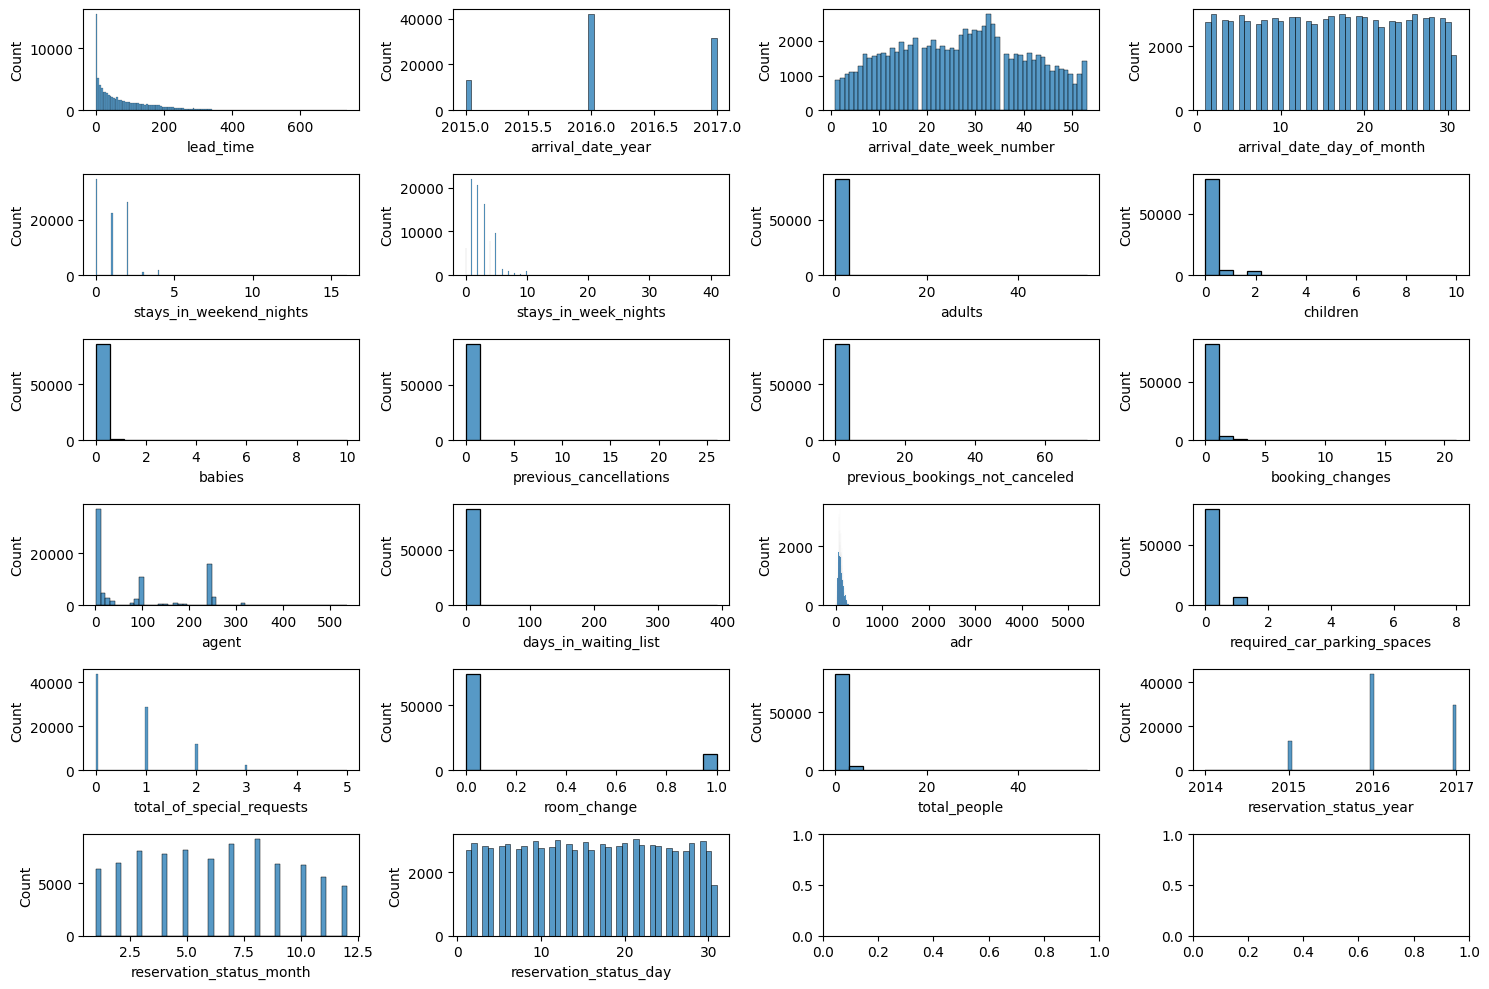

In [17]:
# check numerical values distribution


drop_columns = ['is_canceled', 'is_repeated_guest'] # this drop_columns variable is the columns that represent categorical value but instead has a type int, like binary value

num_cols = df.drop(drop_columns, axis=1).select_dtypes(include=["float","int"]).columns
cols = 4
rows = int(np.ceil(len(num_cols) / 4))

fig, ax = plt.subplots(rows, cols,figsize=(15,10))
ax = ax.flatten()

for i in range(len(num_cols)):
    sns.histplot(data=df, x=num_cols[i], ax=ax[i])

plt.tight_layout()

<Axes: xlabel='is_canceled', ylabel='count'>

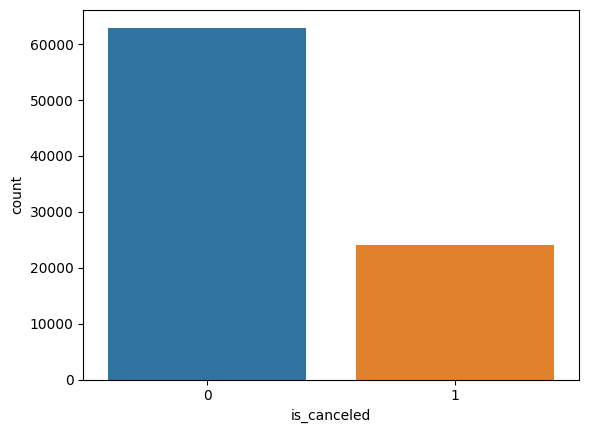

In [ ]:
# is_canceled distribution

sns.countplot(data=df, x='is_canceled', hue='is_canceled', legend=False)

<Axes: xlabel='is_repeated_guest', ylabel='count'>

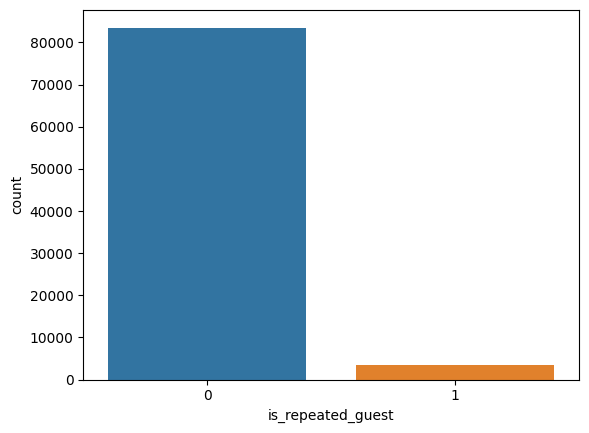

In [ ]:
# is_repeated_guest distribution

sns.countplot(data=df, x='is_repeated_guest', hue='is_repeated_guest', legend=False)

### Categorical Columns


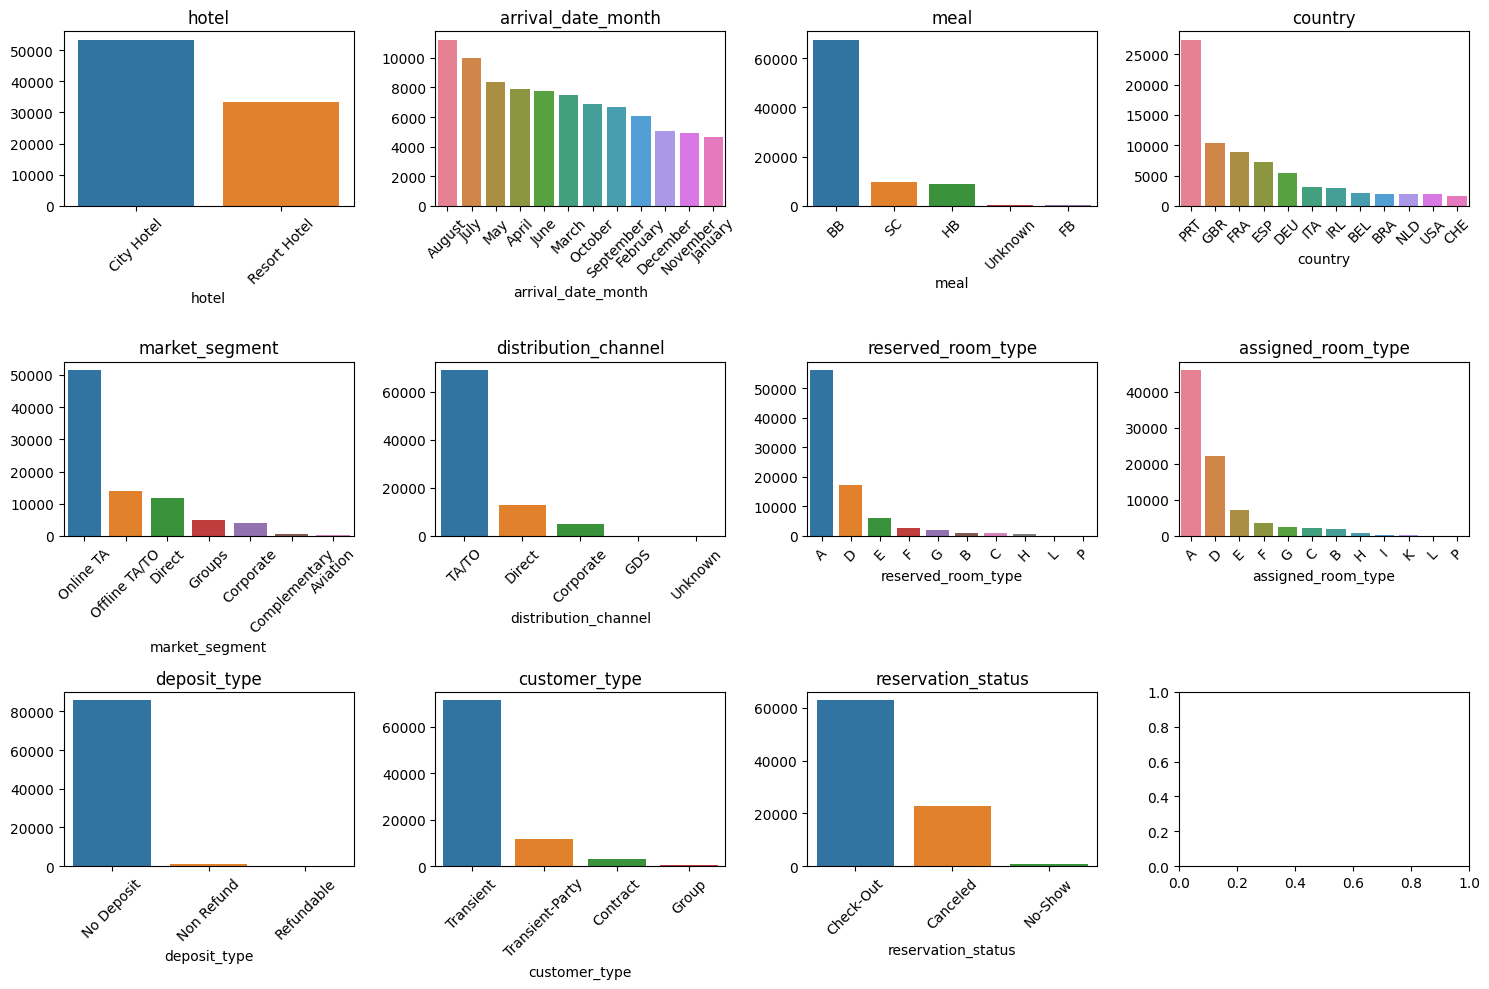

In [ ]:
cat_col = df.drop(["reservation_status_date"], axis=1).select_dtypes(include=['object']).columns
cols = 4
rows = int(np.ceil(len(cat_col)/cols))

fig, ax = plt.subplots(rows, cols, figsize=(15,10))
ax = ax.flatten()

for i in range(len(cat_col)):
    col = cat_col[i]

    val_count = df[col].value_counts().head(12)

    x = val_count.index
    y = val_count.values

    sns.barplot(x=x, y=y, ax=ax[i], hue=x)

    ax[i].set_title(col)
    ax[i].set_xticks(range(len(x)))
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)

plt.tight_layout()

# Preprocessing

In [18]:
drop_cols = ['reservation_status'] # this column is dropped because this data is collected after the target, so it could leak

df_temp = df.drop(drop_cols, axis=1).copy()

## Split data into feature and target & test and train data

In [19]:
# split data into feature and target

X = df_temp.drop('is_canceled', axis=1)
y = df_temp['is_canceled']

In [20]:
# split data into test and train data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)

# Model

In [21]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.4 MB/s eta 0:00:00


In [22]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

from imblearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.combine import SMOTETomek
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
import category_encoders as ce

## CatBoost


In [23]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.0 MB/s eta 0:00:00


In [24]:
from catboost import CatBoostClassifier

In [25]:
cat_features = df_temp.drop(columns=['is_canceled']).select_dtypes(include=['object']).columns.tolist()

In [26]:
catboost_model = CatBoostClassifier(
                          verbose=0,
                          random_state=42,
                          cat_features=cat_features
                          )

catboost_pipeline = Pipeline([
    ('smote', SMOTENC(categorical_features=cat_features, random_state=42)),
    ('cat', catboost_model)
])

In [57]:
# define various parameter
param_grid = {
    'cat__iterations': [100, 200],
    'cat__depth': [3, 5, 7],
    'cat__learning_rate': [0.01, 0.1, 0.3]
}


# Grid search
grid_search = GridSearchCV(
                    catboost_pipeline,
                    param_grid,
                    cv=5,
                    scoring='f1',
                    verbose=1,
                    n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote',
                                        SMOTENC(categorical_features=['hotel',
                                                                      'arrival_date_month',
                                                                      'meal',
                                                                      'country',
                                                                      'market_segment',
                                                                      'distribution_channel',
                                                                      'reserved_room_type',
                                                                      'assigned_room_type',
                                                                      'deposit_type',
                                                                      'customer_type'],
                                                random_state=42)),
                                       ('cat',
                                        <catboost.core.CatBoostClassifier object at 0x79863c889ed0>)]),
             n_jobs=-1,
             param_grid={'cat__depth': [3, 5, 7], 'cat__iterations': [100, 200],
                         'cat__learning_rate': [0.01, 0.1, 0.3]},
             scoring='f1', verbose=1)

In [58]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'cat__depth': 7, 'cat__iterations': 200, 'cat__learning_rate': 0.3}
0.9918415459176606


In [59]:
best_params = {'depth': 7, 'iterations': 200, 'learning_rate': 0.3}

catboost_model = CatBoostClassifier(
                          **best_params,
                          verbose=0,
                          random_state=42,
                          cat_features=cat_features
                          )

catboost_pipeline = Pipeline([
    ('smote', SMOTENC(categorical_features=cat_features, random_state=42)),
    ('cat', catboost_model)
])

In [60]:
catboost_pipeline.fit(X_train, y_train)

Pipeline(steps=[('smote',
                 SMOTENC(categorical_features=['hotel', 'arrival_date_month',
                                               'meal', 'country',
                                               'market_segment',
                                               'distribution_channel',
                                               'reserved_room_type',
                                               'assigned_room_type',
                                               'deposit_type',
                                               'customer_type'],
                         random_state=42)),
                ('cat',
                 <catboost.core.CatBoostClassifier object at 0x79860b881390>)])

In [61]:
catboost_preds = catboost_pipeline.predict(X_test)

print(classification_report(y_test, catboost_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     12591
           1       1.00      0.99      0.99      4797

    accuracy                           1.00     17388
   macro avg       1.00      0.99      0.99     17388
weighted avg       1.00      1.00      1.00     17388



## XGBoost

In [36]:
from xgboost import XGBClassifier

In [37]:
# determined the features to be processed differenty

ord_features = ['hotel']

num_features = df_temp.drop(columns=['is_canceled']).select_dtypes(include=['int','float']).columns

nom_features_te = ['country']
nom_features_ohe = df_temp.drop(columns=nom_features_te+ord_features).select_dtypes(include=['object']).columns.tolist()

In [38]:
xgb_preprocessor = ColumnTransformer([
    ('tar_enc', ce.TargetEncoder(), nom_features_te),
    ('ord_enc', OrdinalEncoder(), ord_features),
    ('one_hot_enc', OneHotEncoder(handle_unknown='ignore'), nom_features_ohe),
], remainder='passthrough')

In [39]:
xgb_pipeline_v1 = Pipeline([
    ('preprocess', xgb_preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(random_state=42))
])

In [40]:
# cross-validation

scores = cross_val_score(xgb_pipeline_v1, X_train, y_train, cv=5, scoring="f1")
print("F1 scores from cross-validation:", scores)
print("Mean F1 Score:", scores.mean())

F1 scores from cross-validation: [0.9931848  0.99476577 0.99371399 0.99384091 0.99476851]
Mean F1 Score: 0.994054793967225


In [41]:
# define various parameter
param_grid = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.3]
}

# Grid search
grid_search = GridSearchCV(
                    xgb_pipeline_v1,
                    param_grid,
                    cv=5,
                    scoring='f1',
                    verbose=1,
                    n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('tar_enc',
                                                                         TargetEncoder(),
                                                                         ['country']),
                                                                        ('ord_enc',
                                                                         OrdinalEncoder(),
                                                                         ['hotel']),
                                                                        ('one_hot_enc',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['arrival_date_month',
                                                                          'meal',
                                                                          'market_segment',
                                                                          'distribution_channel',
                                                                          'reserved_room_type',
                                                                          'assigned_roo...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.01, 0.1, 0.3],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [42]:
# best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best parameters: {'xgb__learning_rate': 0.3, 'xgb__max_depth': 7, 'xgb__n_estimators': 200}
Best F1 Score: 0.9966827041312623


In [43]:
# train the model once again with the best params

best_params = {'xgb__learning_rate': 0.3, 'xgb__max_depth': 7, 'xgb__n_estimators': 200}

xgb_pipeline_v1 = Pipeline([
    ('preprocess', xgb_preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(**best_params, random_state=42))
])

xgb_pipeline_v1.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "xgb__learning_rate", "xgb__max_depth", "xgb__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tar_enc', TargetEncoder(),
                                                  ['country']),
                                                 ('ord_enc', OrdinalEncoder(),
                                                  ['hotel']),
                                                 ('one_hot_enc',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['arrival_date_month', 'meal',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'cust...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [44]:
y_pred = xgb_pipeline_v1.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12591
           1       1.00      0.99      1.00      4797

    accuracy                           1.00     17388
   macro avg       1.00      1.00      1.00     17388
weighted avg       1.00      1.00      1.00     17388



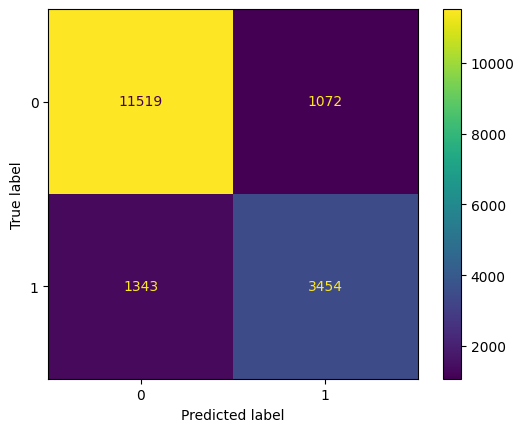

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

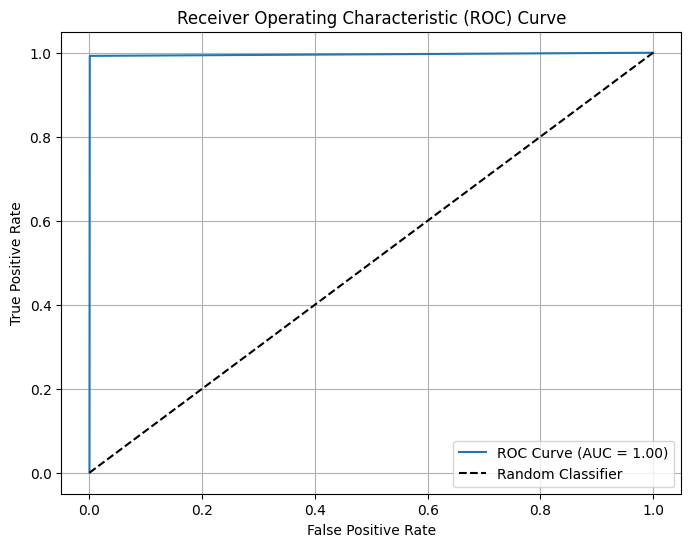

In [45]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf_preprocessor = ColumnTransformer([
    ('tar_enc', ce.TargetEncoder(), nom_features_te),
    ('ord_enc', OrdinalEncoder(), ord_features),
    ('one_hot_enc', OneHotEncoder(handle_unknown='ignore'), nom_features_ohe),
], remainder='passthrough')

In [48]:
rf_pipeline_v1 = Pipeline([
    ('preprocess', rf_preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

In [49]:
rf_pipeline_v1.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tar_enc', TargetEncoder(),
                                                  ['country']),
                                                 ('ord_enc', OrdinalEncoder(),
                                                  ['hotel']),
                                                 ('one_hot_enc',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['arrival_date_month', 'meal',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type'])])),
                ('smote', SMOTE(random_state=42)),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [51]:
y_pred = rf_pipeline_v1.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     12591
           1       0.93      0.81      0.87      4797

    accuracy                           0.93     17388
   macro avg       0.93      0.90      0.91     17388
weighted avg       0.93      0.93      0.93     17388



## Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
lr_preprocessor = ColumnTransformer([
    ('tar_enc', ce.TargetEncoder(), nom_features_te),
    ('ord_enc', OrdinalEncoder(), ord_features),
    ('one_hot_enc', OneHotEncoder(handle_unknown='ignore'), nom_features_ohe),
], remainder='passthrough')

In [54]:
lr_pipeline = Pipeline([
    ('preprocessor', lr_preprocessor),
    ('scaling', StandardScaler()),
    ('model', LogisticRegression(random_state=42))
])

In [55]:
lr_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tar_enc', TargetEncoder(),
                                                  ['country']),
                                                 ('ord_enc', OrdinalEncoder(),
                                                  ['hotel']),
                                                 ('one_hot_enc',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['arrival_date_month', 'meal',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type'])])),
                ('scaling', StandardScaler()),
                ('model', LogisticRegression(random_state=42))])

In [56]:
y_pred = rf_pipeline_v1.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     12591
           1       0.93      0.81      0.87      4797

    accuracy                           0.93     17388
   macro avg       0.93      0.90      0.91     17388
weighted avg       0.93      0.93      0.93     17388

